In [7]:
# Necessary for Colab, not necessary for course environment
# %pip install -qq langchain langchain-nvidia-ai-endpoints gradio
# %pip install -qq arxiv pymupdf
# %pip install -U langchain-community

import os
os.environ["NVIDIA_API_KEY"] = "nvapi-key"

In [8]:
from functools import partial
from rich.console import Console
from rich.style import Style
from rich.theme import Theme

console = Console()
base_style = Style(color="#76B900", bold=True)
pprint = partial(console.print, style=base_style)

In [9]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA, NVIDIAEmbeddings
[m for m in NVIDIAEmbeddings.get_available_models() if "embed" in m.id]

[Model(id='nvidia/nv-embedqa-e5-v5', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/embed-qa-4', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='snowflake/arctic-embed-l', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=['ai-arctic-embed-l'], supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/nv-embedqa-mistral-7b-v2', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvidia/llama-3.2-nv-embedqa-1b-v1', model_type='embedding', client='NVIDIAEmbeddings', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, base_model=None),
 Model(id='nvid

In [10]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA, NVIDIAEmbeddings

# NVIDIAEmbeddings.get_available_models()
# embedder = NVIDIAEmbeddings(model="nvidia/nv-embedqa-mistral-7b-v2")
# embedder = NVIDIAEmbeddings(model="nvidia/nv-embedqa-e5-v5")
# embedder = NVIDIAEmbeddings(model="nvidia/embed-qa-4")
# embedder = NVIDIAEmbeddings(model="snowflake/arctic-embed-l")
embedder = NVIDIAEmbeddings(model="nvidia/nv-embed-v1")

# ChatNVIDIA.get_available_models()
instruct_llm = ChatNVIDIA(model="mistralai/mixtral-8x7b-instruct-v0.1")

In [11]:
# Example queries and documents
queries = [
    "What's the weather like in Rocky Mountains?",
    "What kinds of food is Italy known for?",
    "What's my name? I bet you don't remember...",
    "What's the point of life anyways?",
    "The point of life is to have fun :D"
]

documents = [
    "Komchatka's weather is cold, with long, severe winters.",
    "Italy is famous for pasta, pizza, gelato, and espresso.",
    "I can't recall personal names, only provide information.",
    "Life's purpose varies, often seen as personal fulfillment.",
    "Enjoying life's moments is indeed a wonderful approach.",
]

In [12]:
%%time
# Embedding the queries
q_embeddings = [embedder.embed_query(query) for query in queries]

# Embedding the documents
d_embeddings = embedder.embed_documents(documents)

CPU times: user 73.1 ms, sys: 6.73 ms, total: 79.8 ms
Wall time: 3.2 s


In [ ]:
%%time
# Embedding the queries
q_embeddings = [embedder.embed_query(query) for query in queries]

# Embedding the documents
d_embeddings = embedder.embed_documents(documents)

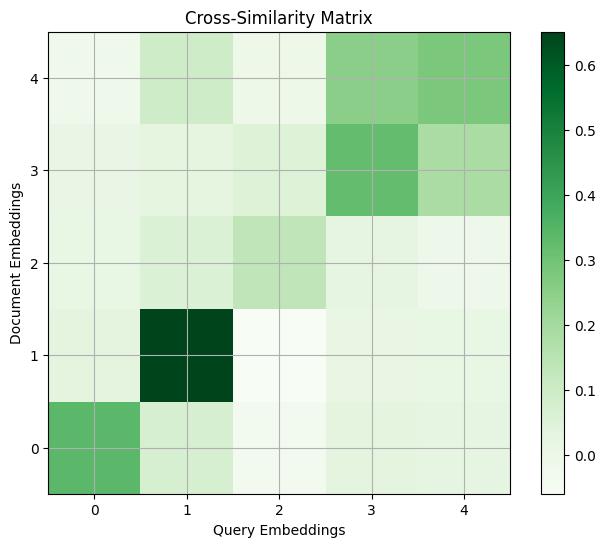

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def plot_cross_similarity_matrix(emb1, emb2):
    # Compute the similarity matrix between embeddings1 and embeddings2
    cross_similarity_matrix = cosine_similarity(np.array(emb1), np.array(emb2))

    # Plotting the cross-similarity matrix
    plt.imshow(cross_similarity_matrix, cmap='Greens', interpolation='nearest')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.title("Cross-Similarity Matrix")
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_cross_similarity_matrix(q_embeddings, d_embeddings)
plt.xlabel("Query Embeddings")
plt.ylabel("Document Embeddings")
plt.show()